In [1]:
df = pd.read_csv('./resource/final_df1.csv')
df2 = pd.read_csv('./resource/final_df2.csv')
df.head()

,rating(y),avg_rating,lee_rating,eval_count,wish_count,cmt_count,run_time,year,star0.5,star1,...,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509
0,3.5,4.22683,4.5,13025,9796,2585,128,2015,7,10,...,0,0,0,0,0,0,0,0,0,0
1,2.5,2.99629,3.0,58122,3166,965,121,2013,1312,2238,...,0,0,0,0,0,0,0,0,0,0
2,4.0,3.90119,3.0,66296,33565,1539,108,2013,228,316,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.62241,3.0,67031,1079,712,104,2013,3615,4063,...,0,0,0,0,0,0,0,0,0,0
4,3.0,3.31175,3.0,68174,9510,2439,119,2014,787,1612,...,0,0,0,0,0,0,0,0,0,0


### Xn, y :

In [2]:
y_df = df['rating(y)']
X_df = df.drop('rating(y)', axis=1)
X_df2 = df2.drop(['rating(y)', 'skew'], axis=1)
X_df3 = df.drop(['rating(y)', 'lee_rating'], axis=1)
X_df4 = df.drop(['rating(y)', 'lee_rating', 'run_time', 'year'], axis=1)
X_df5 = df.drop(['rating(y)', 'lee_rating', 'run_time', 'year', 'avg_rating'], axis=1)
X_df6 = df.drop(['rating(y)', 'lee_rating', 'run_time', 'year', 'avg_rating', 
         'star0.5', 'star1', 'star1.5', 'star2', 'star2.5', 'star3', 'star3.5', 'star4', 'star4.5', 'star5'], axis=1)
X_df7 = df.drop(['rating(y)', 'lee_rating', 'run_time', 'year', 'avg_rating', 'eval_count',
                'wish_count', 'cmt_count'], axis=1)
X_df8 = df.ix[:,'0':]
X_df9 = df.ix[:,'avg_rating':'star5']

y = y_df.as_matrix().astype('string')

X = X_df.as_matrix() # 별점분포 그대로 사용
X2 = X_df2.as_matrix() # 별점분포를 std로 사용(skew는 negative 오류나서 뺌)
X3 = X_df3.as_matrix() # X에서 lee_rating 뻄
X4 = X_df4.as_matrix() # X에서 lee_rating, run_time, year 뻄
X5 = X_df5.as_matrix() # X에서 lee_rating, run_time, year, avg_rating 뻄
X6 = X_df6.as_matrix() # X에서 lee_rating, run_time, year, avg_rating, 별점분포 뻄
X7 = X_df7.as_matrix() # 별점분포 + sparse matrix로만 구성
X8 = X_df8.as_matrix() # sparse matrix로만 피쳐구성
X9 = X_df9.as_matrix() # sparse matrix빼고 구성

In [4]:
X

array([[  4.22683000e+00,   4.50000000e+00,   1.30250000e+04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.99629000e+00,   3.00000000e+00,   5.81220000e+04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.90119000e+00,   3.00000000e+00,   6.62960000e+04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  4.10486000e+00,   3.00000000e+00,   5.64090000e+05, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.97457000e+00,   3.00000000e+00,   3.41757000e+05, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.65453000e+00,   3.00000000e+00,   4.61916000e+05, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

### Mulitnomial NB

In [4]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB(alpha=0.00001).fit(X, y)
clf2 = MultinomialNB().fit(X2, y)
clf3 = MultinomialNB().fit(X3, y)
clf4 = MultinomialNB().fit(X4, y)
clf5 = MultinomialNB().fit(X5, y)
clf6 = MultinomialNB().fit(X6, y)
clf7 = MultinomialNB().fit(X7, y)
clf8 = MultinomialNB().fit(X8, y)
clf9 = MultinomialNB().fit(X9, y)

In [5]:
clf1_predicted = clf1.predict(X)
clf2_predicted = clf2.predict(X2)
clf3_predicted = clf3.predict(X3)
clf4_predicted = clf4.predict(X4)
clf5_predicted = clf5.predict(X5)
clf6_predicted = clf6.predict(X6)
clf7_predicted = clf7.predict(X7)
clf8_predicted = clf8.predict(X8)
clf9_predicted = clf9.predict(X9)

### 0.5 - 5점까지 10개의 Class 존재 (baseline = 0.1)
* alpah = 1 (default)

In [6]:
# 별점분포 그대로 사용한 경우
np.mean(clf1_predicted == y)

0.26838235294117646

In [7]:
# 별점분포 std로 바꾼경우 = > score내려감 => bad!!!
np.mean(clf2_predicted == y)

0.16544117647058823

In [8]:
# lee_rating 뺐더니 그대로 => 의미없는 feature
np.mean(clf3_predicted == y)

0.26838235294117646

In [9]:
# run_time 뻈더니 그대로 => 의미없는 feature
# year 뻈더니 => score 조금오름
np.mean(clf4_predicted == y)

0.27205882352941174

In [10]:
# avg_rating 뻈더니 그대로 => 의미없는 feature
np.mean(clf5_predicted == y)

0.27205882352941174

In [11]:
# 별점분포 뱄더니 => score내려감 => bad!!!
np.mean(clf6_predicted == y)

0.15808823529411764

In [12]:
# 별점분포 다시포함, eval, wish, cmt_count 뻈더니 => score 오름 0.2867
# wish 뺐더니 => 0.2849
# wish, cmt 뺐더니 => 0.2867
np.mean(clf7_predicted == y)

0.28676470588235292

In [13]:
# 배우피쳐로만 한경우 => score.....................
np.mean(clf8_predicted == y)

0.6783088235294118

In [14]:
# sparse matrix 빼고 한 경우 => 맨처음 결과와 똑같음
np.mean(clf9_predicted == y)

0.26838235294117646

In [34]:
y

array(['3.5', '2.5', '4.0', '2.0', '3.0', '2.0', '2.5', '3.5', '2.0',
       '4.0', '4.5', '3.0', '3.5', '3.0', '3.5', '3.5', '4.0', '4.0',
       '3.0', '3.5', '3.5', '4.0', '3.5', '2.5', '0.5', '3.0', '3.5',
       '3.5', '4.0', '3.5', '3.5', '4.5', '4.5', '4.5', '4.5', '4.5',
       '4.5', '3.0', '3.5', '4.5', '4.5', '5.0', '3.0', '4.0', '5.0',
       '4.0', '3.5', '4.0', '4.0', '4.5', '4.0', '4.5', '4.0', '4.0',
       '4.0', '4.5', '2.5', '4.0', '3.0', '2.0', '4.5', '3.0', '2.5',
       '1.0', '0.5', '2.0', '2.0', '2.5', '1.0', '2.5', '3.5', '5.0',
       '3.0', '3.0', '2.5', '4.0', '3.0', '2.0', '3.0', '5.0', '4.0',
       '3.0', '3.0', '2.0', '3.0', '1.0', '3.0', '3.0', '2.0', '3.0',
       '1.0', '1.0', '2.0', '2.0', '1.0', '2.0', '1.0', '2.0', '2.0',
       '3.0', '4.0', '3.0', '4.0', '1.0', '4.0', '3.0', '4.0', '3.0',
       '4.0', '2.0', '4.0', '3.0', '4.0', '3.0', '1.0', '2.0', '2.0',
       '2.0', '1.0', '3.0', '3.0', '3.0', '3.0', '4.0', '2.0', '4.0',
       '3.0', '3.0',

#### clf8_predicted

In [15]:
# X7
df.drop(['rating(y)', 'lee_rating', 'run_time', 'year', 'avg_rating', 'eval_count',
                'wish_count', 'cmt_count'], axis=1).head(1)

,star0.5,star1,star1.5,star2,star2.5,star3,star3.5,star4,star4.5,star5,...,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509
0,7,10,14,83,50,1472,454,4509,4318,2108,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# X8
df.ix[:,'0':].head(1)

,0,1,2,3,4,5,6,7,8,9,...,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# X9
df.ix[:,'avg_rating':'star5'].head(1)

,avg_rating,lee_rating,eval_count,wish_count,cmt_count,run_time,year,star0.5,star1,star1.5,star2,star2.5,star3,star3.5,star4,star4.5,star5
0,4.22683,4.5,13025,9796,2585,128,2015,7,10,14,83,50,1472,454,4509,4318,2108


## 1번 DF의 형태(피쳐 전체포함 real value+category value)

In [28]:
X_df.head(1)

,avg_rating,lee_rating,eval_count,wish_count,cmt_count,run_time,year,star0.5,star1,star1.5,...,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509
0,4.22683,4.5,13025,9796,2585,128,2015,7,10,14,...,0,0,0,0,0,0,0,0,0,0


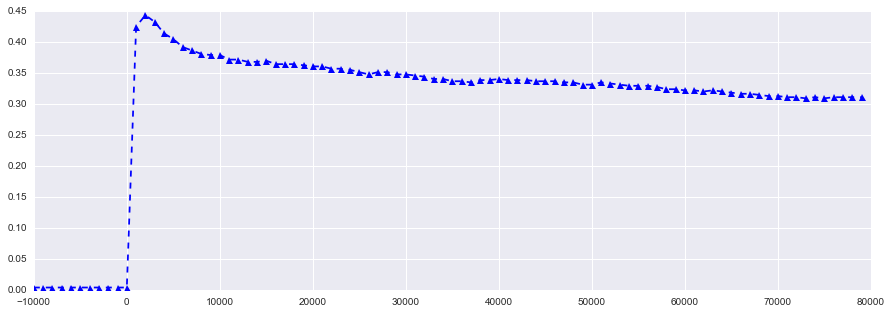

In [19]:
# X 사용결과
i_range=[]
score_range=[]

for i in np.arange(-10000, 80000, 1000):
    clf = MultinomialNB(alpha=i).fit(X, y)
    clf_predicted = clf.predict(X)
    score =  np.mean(clf_predicted == y)
    #print(i,'  ', score)
    
    i_range.append(i)
    score_range.append(score)

plt.figure(figsize=(15, 5))
plt.plot(i_range, score_range, 'b^--')

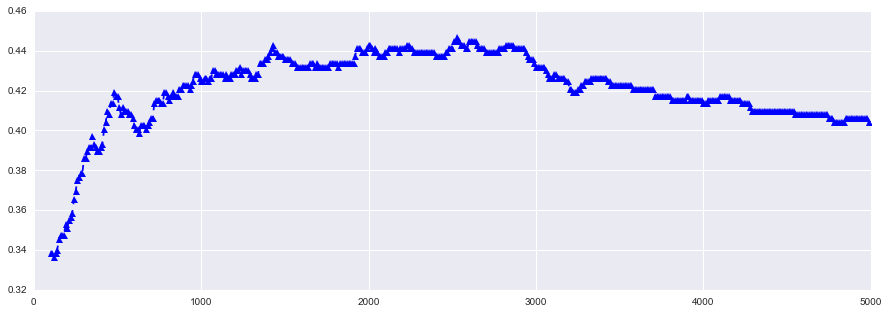

In [20]:
# X9 사용결과
i_range=[]
score_range=[]

for i in np.arange(100, 5000, 10):
    clf = MultinomialNB(alpha=i).fit(X, y)
    clf_predicted = clf.predict(X)
    score =  np.mean(clf_predicted == y)
    #print(i,'  ', score)
    
    i_range.append(i)
    score_range.append(score)

plt.figure(figsize=(15, 5))
plt.plot(i_range, score_range, 'b^--')

## 2번 DF의 형태(category value만: 감독, 배우, 장르, 국가의 sparse matrix로만 피쳐구성)

In [31]:
X_df8.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


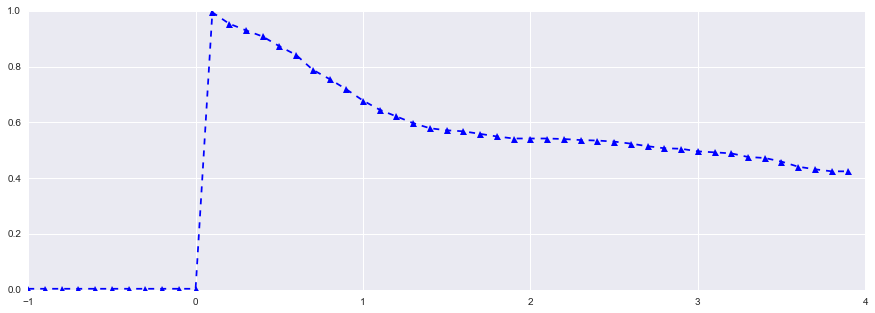

In [32]:
# X8(sparse only) 사용결과
i_range=[]
score_range=[]

for i in np.arange(-1, 4, 0.1):
    clf = MultinomialNB(alpha=i).fit(X8, y)
    clf_predicted = clf.predict(X8)
    score =  np.mean(clf_predicted == y)
    #print(i,'  ', score)
    
    i_range.append(i)
    score_range.append(score)

plt.figure(figsize=(15, 5))
plt.plot(i_range, score_range, 'b^--')